# Table of Contents:

* [Set 1 Analysis: Unicast vs Multicast](#set1)
    * [Introduction](#s1-introduction)
    * [Configuration](#s1-configuration)
    * [Latency Data Summary](#s1-latency-data-summary)
    * [Latency CDFs Per Run](#s1-latency-cdfs-per-run)
    * [Throughput Data Summary](#s1-throughput-data-summary)
    * [Throughput CDFs Per Run](#s1-throughput-cdfs-per-run)
* [Set 2 Analysis: Unicast vs Multicast For Increasing Participants](#set2)
    * [Introduction](#s2-introduction)
    * [Test Configuration](#s2-test-configuration)
    * [Latency CDFs](#s2-latency-cdfs)
* [Set 3 Analysis: Distributed Denial of Service](#set3)
    * [Introduction](#s3-introduction)
    * [50 Participant Comparison](#s3-50-participant-comparison)
        * [Latency CDFs Per Data Length](#s3-latency-cdfs-per-data-length)
    * [100 Participant Comparison](#s3-100-participant-comparison)
        * [Latency CDFs Per Data Length](#s3-latency-cdfs-per-data-length)  

# Set 1 Analysis: Unicast vs Multicast <a class="anchor" id="set1"></a>

## Introduction <a class="anchor" id="s1-introduction"></a>
So....the foundation. The start. The base case. What is the focus of this set of tests? It's just to act as a base case to compare other test results to but at the same time it's also somewhat of a calibration. To understand if the results are fine. To check if the system is working as it should be and if the results make sense.

## Configuration <a class="anchor" id="s1-configuration"></a>
|     Configuration     |          Values         | Notes                                                                                                                              |
|:---------------------:|:-----------------------:|------------------------------------------------------------------------------------------------------------------------------------|
|   Participant Amount  |         3P + 3S         | P: Publishers S: Subscribers                                                                                                       |
|  Publisher Allocation |        1, 1, 1, 0       | VM1, VM2, VM3, VM4                                                                                                                 |
| Subscriber Allocation |        1, 1, 1, 0       | VM1, VM2, VM3, VM4                                                                                                                 |
|      Data Length      |           100B          |                                                                                                                                    |
|     Test Duration     |           900S          |                                                                                                                                    |
|       Test Type       |       `throughput`      | Choices were `throughput` or `latency`.                                                                                            |
|     Latency Count     |           1000          | Number of packets between each latency measurement packet.                                                                         |
|      Reliability      |        `reliable`       | Choices were `reliable` or `best effort`.                                                                                          |
|  Communication Method | `unicast` / `multicast` | `unicast` is one to one communication whilst `multicast` is one to many.                                                           |
|   Network Transport   |         `UDPv4`         | As opposed to the default of `sharedmem` where participants on the same machine don't require samples to travel to routing device. |

So...starting off...what do we want to see? What do we need to show? We have the latency and throughput where the latency is per publisher and the throughput is per subscriber so there is a lot more throughput data than latency. Before we graph anything we should summarise the data.

We have 2 different test configurations and 3 runs of each one. So we have 6 instances of results. The following configurations were run:

1. Unicast
2. Multicast

Let's take a look at the result files:
1. Unicast
    - `average_latencies.csv`
    - `sub_0_output_average_throughputs.csv`
    - `sub_1_output_average_throughputs.csv`
    - `sub_2_output_average_throughputs.csv`
2. Multicast
    - `average_latencies.csv`
    - `sub_0_output_average_throughputs.csv`
    - `sub_1_output_average_throughputs.csv`
    - `sub_2_output_average_throughputs.csv`

For each test we have the average latency and average throughputs.

Given this, let's start off by plotting the CDFs of the latencies for each run.

## Latency Data Summary <a class='anchor' id='s1-latency-data-summary'></a>

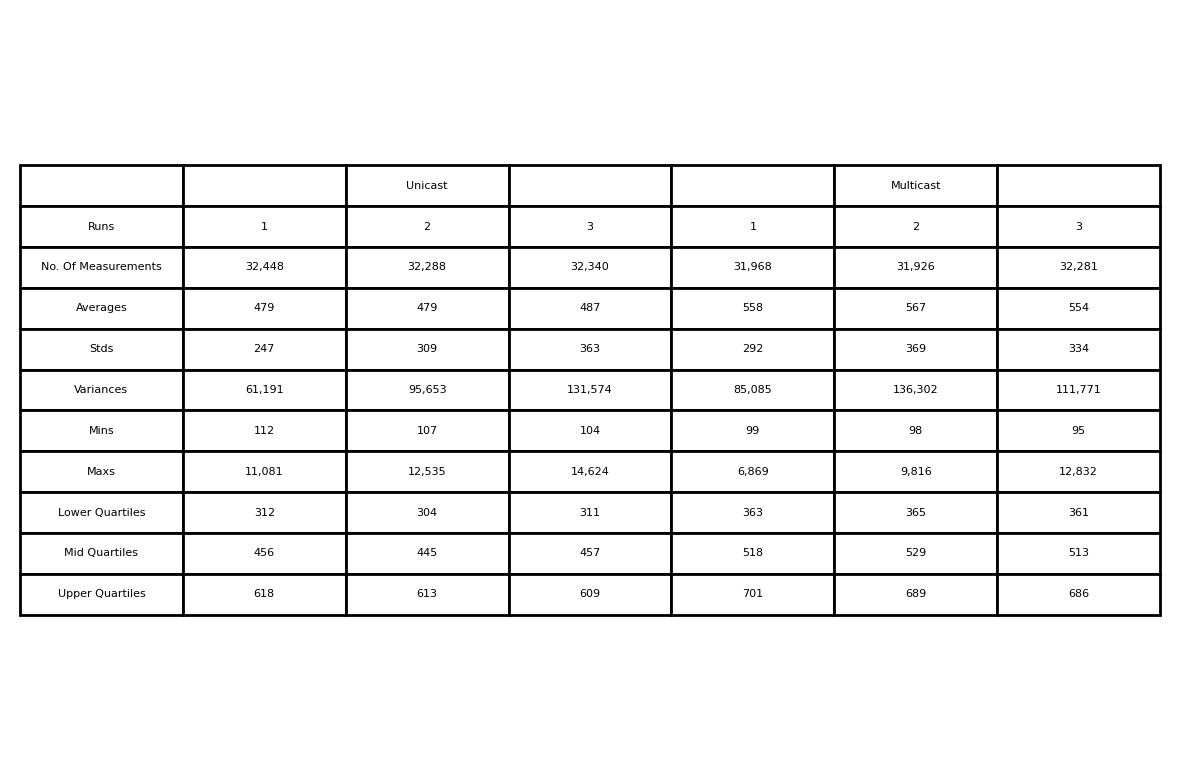

In [1]:
from all_functions import *
from set_1_functions import *

ucast = [file for file in get_files('data/set_1') if 'average_latencies' in file and 'unicast' in file][0]
mcast = [file for file in get_files('data/set_1') if 'average_latencies' in file and 'multicast' in file][0]

plot_summary_table(ucast, mcast)

## Latency CDFs Per Run <a class="anchor" id="s1-latency-cdfs-per-run"></a>

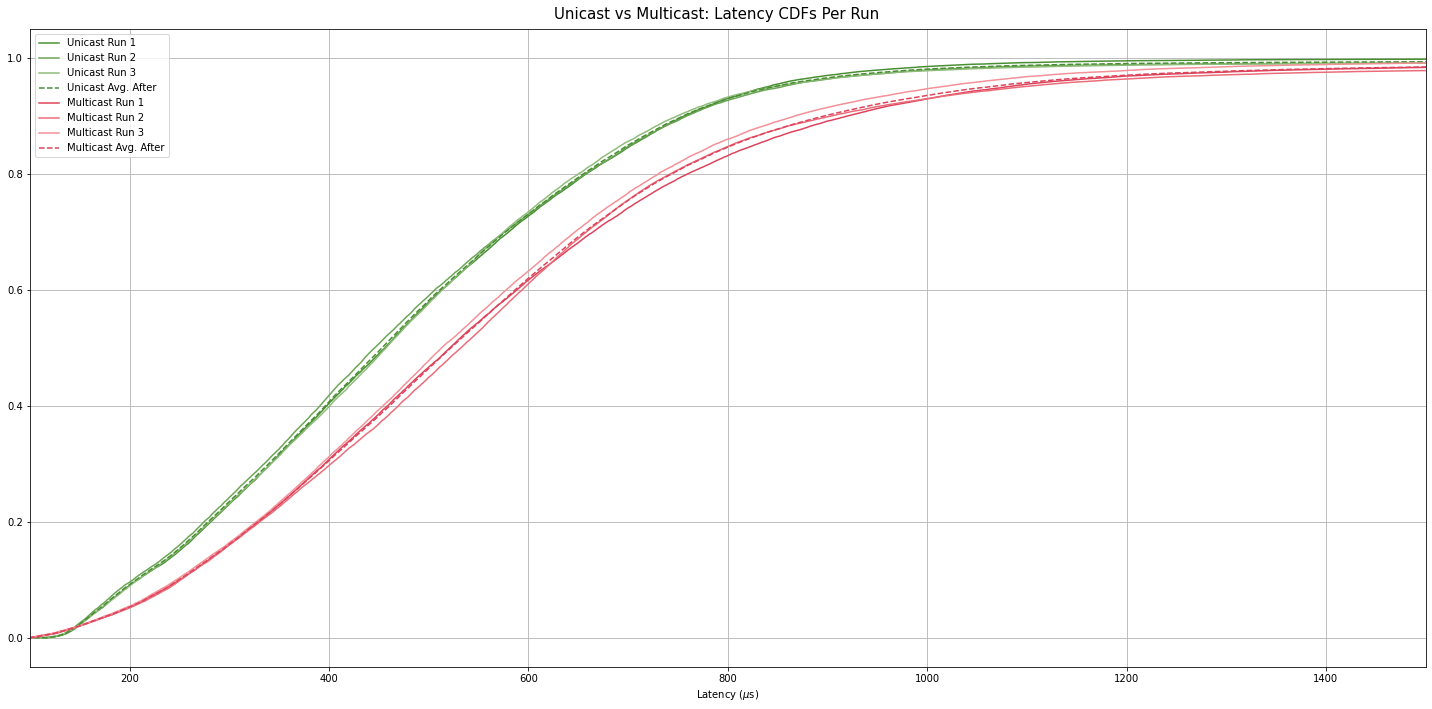

In [2]:
files = [file for file in get_files('data/set_1') if 'average' in file and 'forced' in file]
raw_lat_files = [file for file in files if 'average_latencies' in file]
avg_lats = { 'unicast': raw_lat_files[0], 'multicast': raw_lat_files[1] }

fig, ax = plt.subplots(figsize=(20, 10))

df = pd.read_csv(avg_lats['unicast'])
combined_df = pd.concat([ df['run_1_latency'], df['run_2_latency'], df['run_3_latency'] ])
plot_cdf('Unicast Run 1', df['run_1_latency'], ax, greens[0], 'latency')
plot_cdf('Unicast Run 2', df['run_2_latency'], ax, greens[2], 'latency')
plot_cdf('Unicast Run 3', df['run_3_latency'], ax, greens[4], 'latency')
plot_cdf('Unicast Avg. After', combined_df, ax, greens[0], 'average')

df = pd.read_csv(avg_lats['multicast'])
combined_df = pd.concat([ df['run_1_latency'], df['run_2_latency'], df['run_3_latency'] ])
plot_cdf('Multicast Run 1', df['run_1_latency'], ax, reds[0], 'latency')
plot_cdf('Multicast Run 2', df['run_2_latency'], ax, reds[2], 'latency')
plot_cdf('Multicast Run 3', df['run_3_latency'], ax, reds[4], 'latency')
plot_cdf('Multicast Avg. After', combined_df, ax, reds[0], 'average')

ax.set_xlim(xmin=100, xmax=1500)
_ = ax.legend()
ax.grid()
ax.set_xlabel("Latency ($\mu$s)")
_ = ax.get_figure().suptitle("Unicast vs Multicast: Latency CDFs Per Run", fontsize=15)

plt.tight_layout()

## Throughput Data Summary <a class='anchor' id='s1-throughput-data-summary'></a>
### sub_0

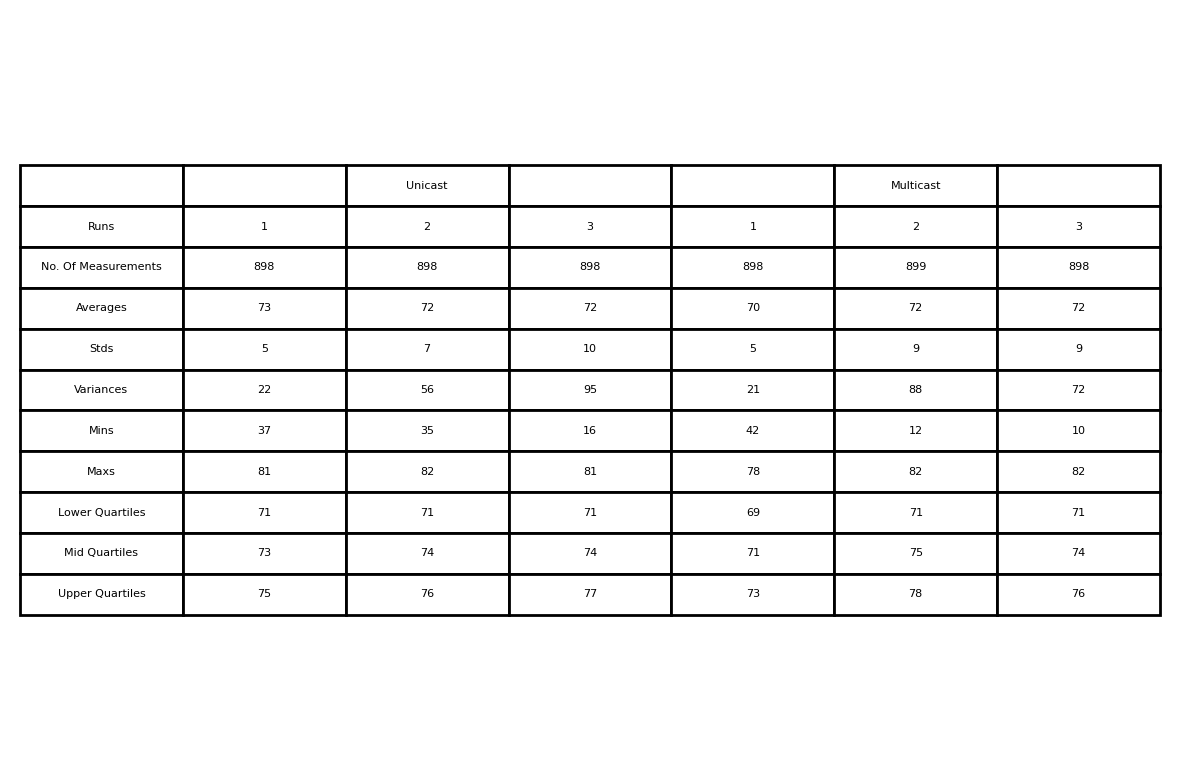

In [3]:
# Get unicast latency files
ucast = [file for file in get_files('data/set_1') if 'average' in file and 'throughput' in file and 'sub_0' in file and 'unicast' in file][0]
mcast = [file for file in get_files('data/set_1') if 'average' in file and 'throughput' in file and 'sub_0' in file and 'multicast' in file][0]

plot_summary_table(ucast, mcast)

### sub_1

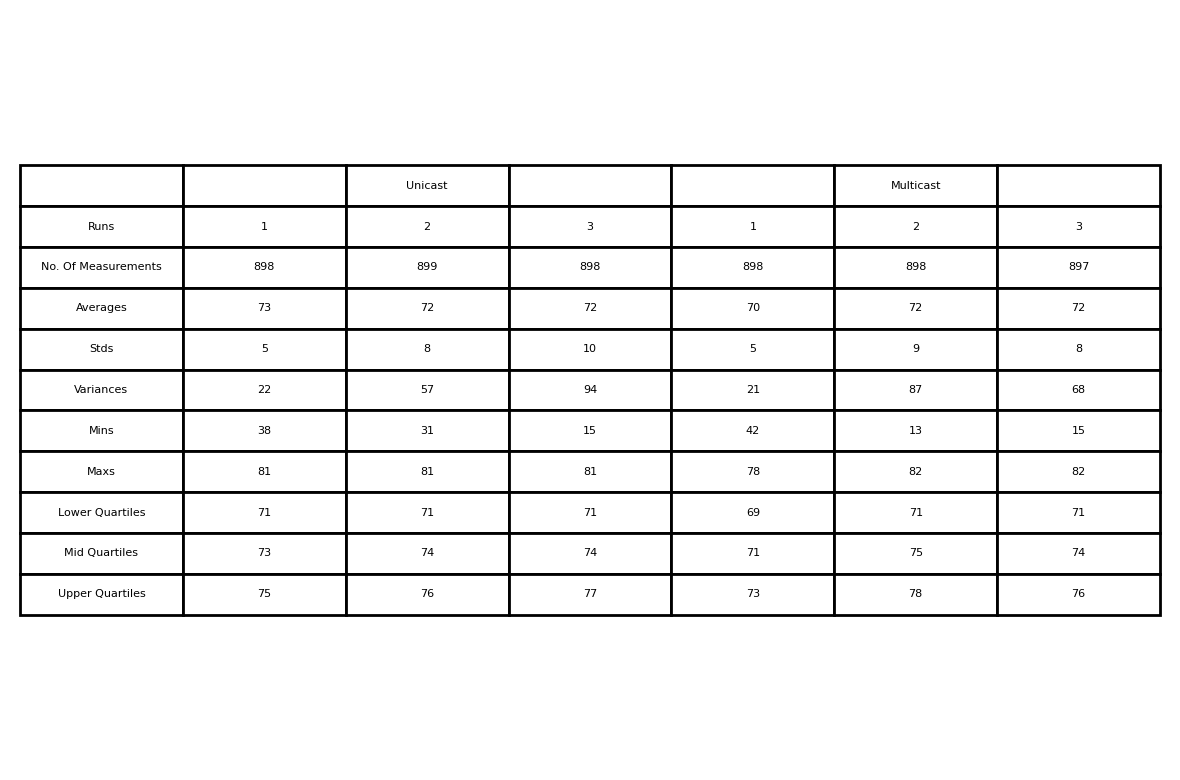

In [4]:
# Get unicast latency files
ucast_lats = [file for file in get_files('data/set_1') if 'average' in file and 'throughput' in file and 'sub_1' in file and 'unicast' in file][0]
mcast_lats = [file for file in get_files('data/set_1') if 'average' in file and 'throughput' in file and 'sub_1' in file and 'multicast' in file][0]
plot_summary_table(ucast_lats, mcast_lats)

### sub_2

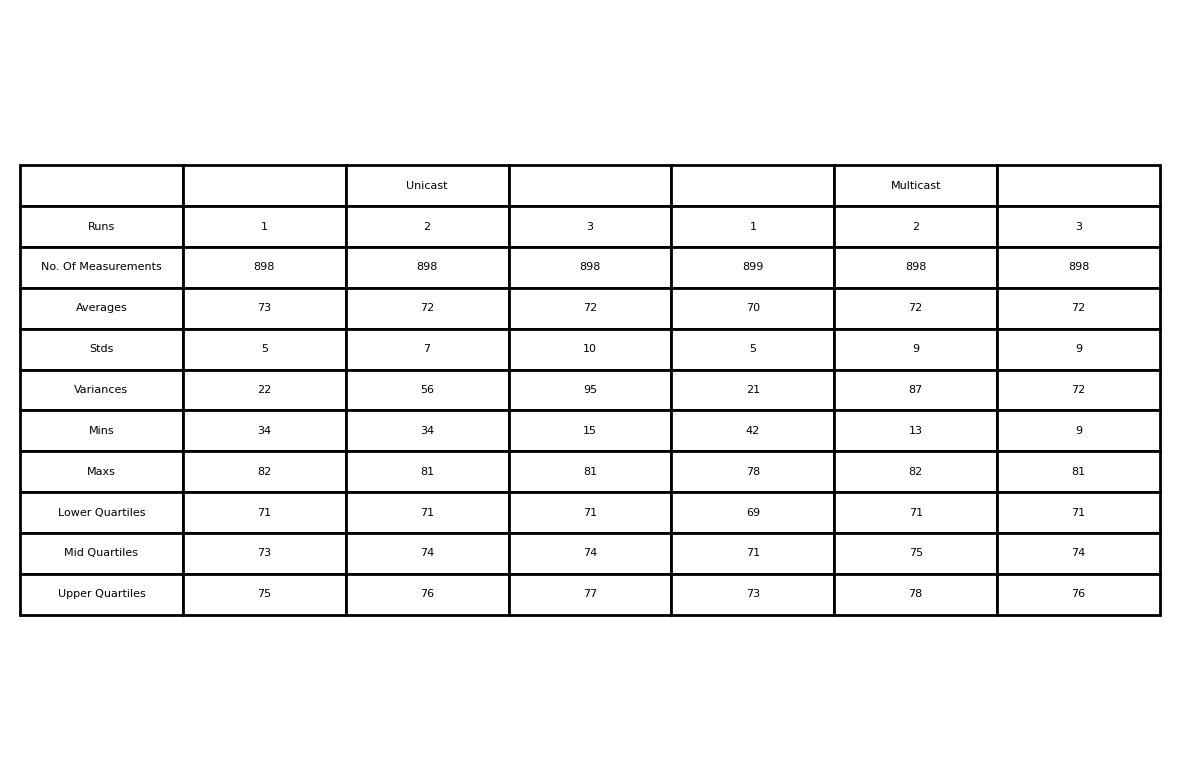

In [5]:
# Get unicast latency files
ucast = [file for file in get_files('data/set_1') if 'average' in file and 'throughput' in file and 'sub_2' in file and 'unicast' in file][0]
mcast = [file for file in get_files('data/set_1') if 'average' in file and 'throughput' in file and 'sub_2' in file and 'multicast' in file][0]
plot_summary_table(ucast, mcast)

## Throughput CDFs Per Run (Unicast vs Multicast) <a class='anchor' id='s1-throughput-cdfs-per-run'></a>

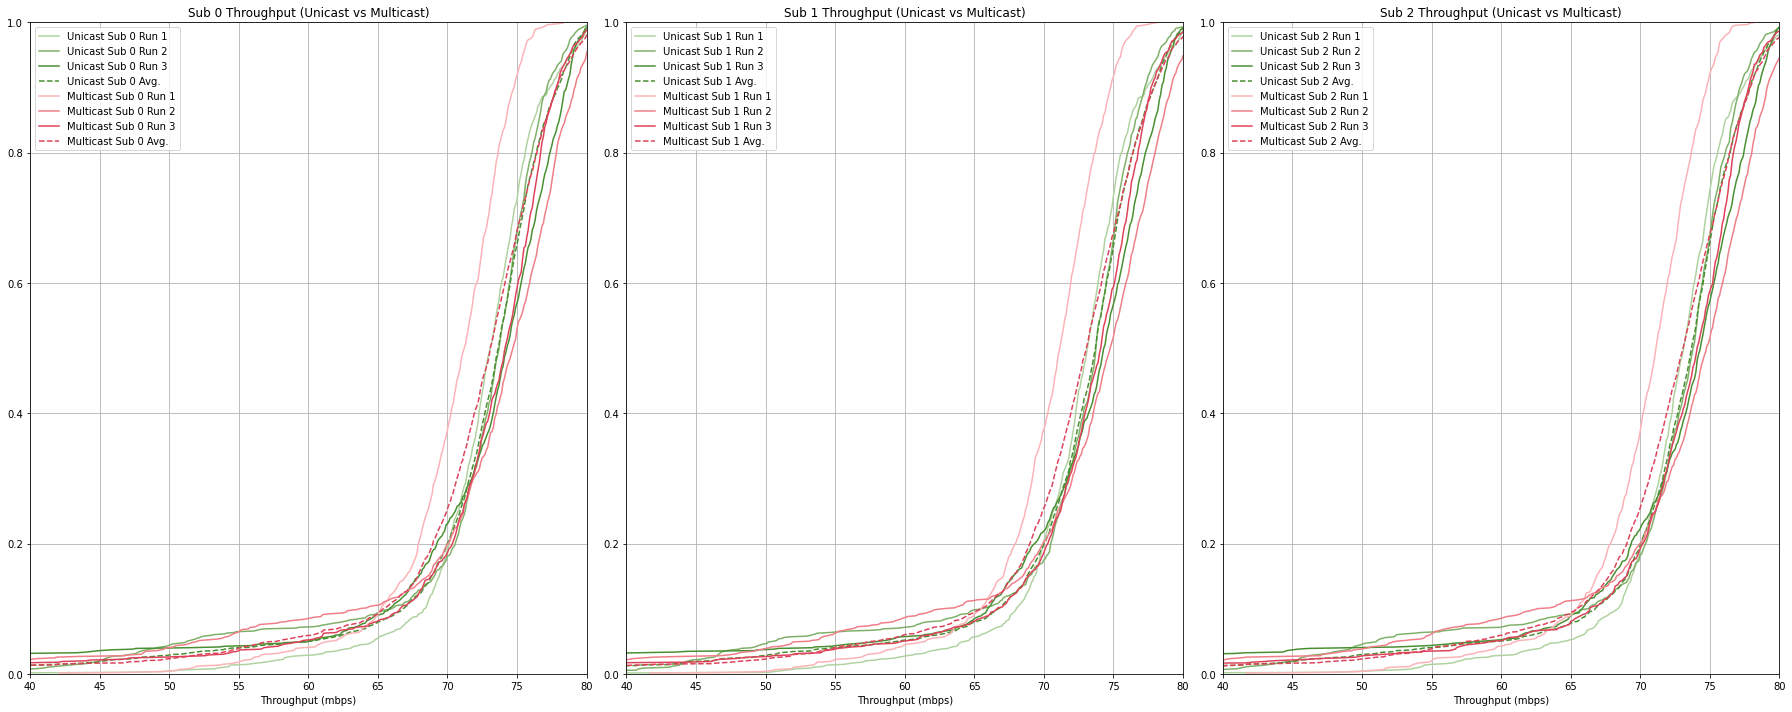

In [6]:

tp_files = [file for file in files if 'throughput' in file]

avg_tps = {
    'unicast': [file for file in tp_files if 'unicast' in file],
    'multicast': [file for file in tp_files if 'multicast' in file]
}

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))

axes[0].set_title("Sub 0 Throughput (Unicast vs Multicast)")
axes[1].set_title("Sub 1 Throughput (Unicast vs Multicast)")
axes[2].set_title("Sub 2 Throughput (Unicast vs Multicast)")

plot_unicast_tp_cdfs(avg_tps['unicast'], axes)
plot_multicast_tp_cdfs(avg_tps['multicast'], axes)

for ax in axes:
    ax.legend()
    ax.grid()
    ax.set_xlabel("Throughput (mbps)")
    ax.set_xlim(xmin=40, xmax=80)
    ax.set_ylim(ymin=0, ymax=1)
plt.tight_layout()

# Set 2 Analysis: Unicast vs Multicast For Increasing Participants <a class="anchor" id="set2"></a>

## Table of Contents

- Introduction
- Test Configuration
- Latency CDFs
- Latency CDFs Per Participant Amount
- Throughput CDFs
- Throughput CDFs Per Participant Amount

## Introduction <a class='anchor' id="s2-introduction"></a>

For Set 2 we change the number of participants whilst comparing Unicast performance with Multicast. This is mainly to see at what point does Multicast outperform Unicast.

In theory, we know that Multicast has 2 "hops" with any amount of participants. This is 1 hop from the publisher to the multicast router and another hope from multicast router to all participants. Meanwhile, unicast has 2n hops for n amount of participants where each participant receives the data sequentially. Therefore, generally speaking, multicast should outperform unicast. However, the data speaks differently...

## Test Configuration <a class="anchor" id="s2-test-configuration"></a>
So we defined some tests to see how the performance is affected when increasing the participants with the following configurations:

|     Configuration     |                             Values                             | Notes                                                                                                                              |
|:---------------------:|:--------------------------------------------------------------:|------------------------------------------------------------------------------------------------------------------------------------|
|   Participant Amount  |          10P + 10S, 25P + 25S, 50P + 50S, 100P + 100S          | P: Publishers. S: Subscribers.                                                                                                     |
|  Publisher Allocation | [3, 2, 3, 2], [6, 7, 6, 7], [12, 13, 12, 13], [25, 25, 25, 25] | Test 1, Test 2, Test 3, Test 4 [VM1, VM2, VM3, VM4]                                                                                |
| Subscriber Allocation | [3, 2, 3, 2], [6, 7, 6, 7], [12, 13, 12, 13], [25, 25, 25, 25] | Test 1, Test 2, Test 3, Test 4 [VM1, VM2, VM3, VM4]                                                                                |
|      Data Length      |                              100B                              |                                                                                                                                    |
|     Test Duration     |                              900S                              |                                                                                                                                    |
|       Test Type       |                          `throughput`                          | Choices were `throughput` or `latency`.                                                                                            |
|     Latency Count     |                              1000                              | Number of packtes between each latency measurement packet.                                                                         |
|      Reliability      |                           `reliable`                           | Choices were `reliable` or `best effort`.                                                                                          |
|  Communication Method |                     `unicast` / `multicast`                    | `unicast` is one to one communication while `multicast` is one to many.                                                            |
|   Network Transport   |                             `UDPv4`                            | As opposed to the default of `sharedmem` where participants on the same machine don't require samples to travel to routing device. |

Basically, we varied `unicast` and `multicast` for 10P + 10S, 25P + 25S, 50P + 50S, and 100P + 100S.

For each of the tests (10P + 10S, ..., 100P + 100S) we have the following results as files (applies for both `unicast` and `multicast`):

```
    - average_latencies.csv
    - sub_0_output_average_throughput.csv
    - ...
    - sub_n_output_average_throughput.csv
    
```

Therefore, the next step is actually analysing the results. We start off looking at the CDFs of the latencies:

## Results Summary

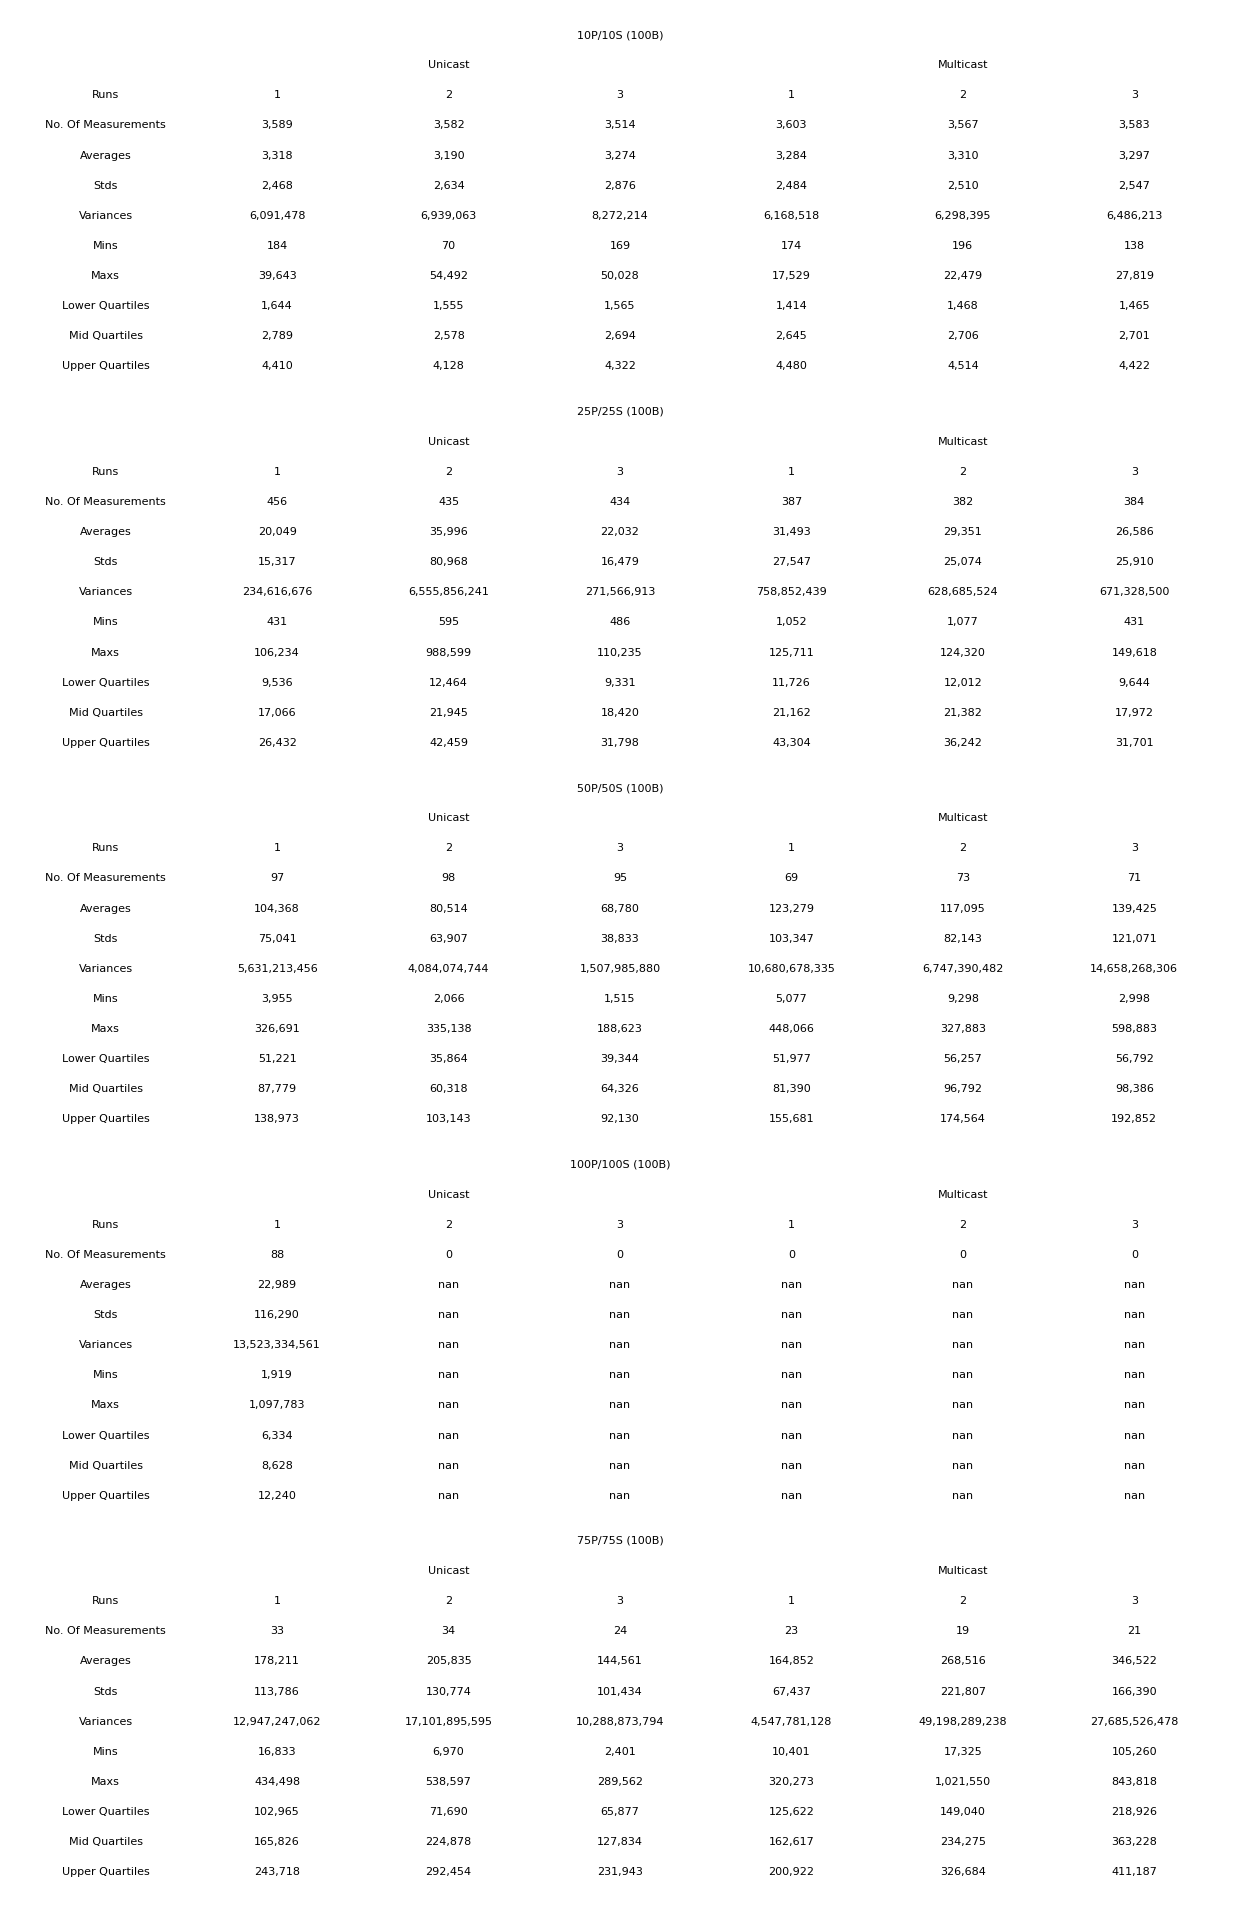

In [7]:
def plot_summary_table(ax, ucast, mcast):
    # Get unicast latency files
    testname = ["", "", "", get_test_names([ucast])[0].replace("Unicast ", ""), "", "", ""]
    headings = ["", "", "Unicast", "", "", "Multicast", ""]
    runs = ["Runs", 1, 2, 3, 1, 2, 3]
    metric_count = ["No. of Measurements".title()]
    averages = ["averages".title()]
    stds = ["stds".title()]
    variances = ["variances".title()]
    mins = ["mins".title()]
    maxs = ["maxs".title()]
    lower_quartiles = ["lower_quartiles".title().replace("_", " ")]
    mid_quartiles = ["mid_quartiles".title().replace("_", " ")]
    upper_quartiles = ["upper_quartiles".title().replace("_", " ")]

    df = pd.read_csv(ucast)
    for col in df.columns[1:4]:
        metric_count.append(format_number(df[col].count()))
        averages.append(format_number(df[col].mean()))
        stds.append(format_number(df[col].std()))
        variances.append(format_number(df[col].var()))
        mins.append(format_number(df[col].min()))
        maxs.append(format_number(df[col].max()))
        lower_quartiles.append(format_number(df[col].quantile(.25)))
        mid_quartiles.append(format_number(df[col].quantile(.5)))
        upper_quartiles.append(format_number(df[col].quantile(.75)))

    df = pd.read_csv(mcast)
    for col in df.columns[1:4]:
        metric_count.append(format_number(df[col].count()))
        averages.append(format_number(df[col].mean()))
        stds.append(format_number(df[col].std()))
        variances.append(format_number(df[col].var()))
        mins.append(format_number(df[col].min()))
        maxs.append(format_number(df[col].max()))
        lower_quartiles.append(format_number(df[col].quantile(.25)))
        mid_quartiles.append(format_number(df[col].quantile(.5)))
        upper_quartiles.append(format_number(df[col].quantile(.75)))

    rows = [headings, runs, metric_count, averages, stds, variances, mins, maxs, lower_quartiles, mid_quartiles, upper_quartiles]

    # Get summary data for unicast per run
    
    table = plot_table(ax, testname, rows)
    table.auto_set_font_size(False)
    table.set_fontsize(4)
    for key, cell in table.get_celld().items():
        cell.set_linewidth(0)

ucast = [file for file in get_files('data/set_2') if 'average_latencies' in file and 'forced_transport' in file and 'unicast' in file]
mcast = [file for file in get_files('data/set_2') if 'average_latencies' in file and 'forced_transport' in file and 'multicast' in file]
ucast.sort()
mcast.sort()
mcast = mcast[1:] + mcast[:1]

fig, axes = plt.subplots(nrows=len(ucast), ncols=1, dpi=200)

for i in range(len(ucast)):
    axes[i].set_axis_off()
    plot_summary_table(axes[i], ucast[i], mcast[i])

# plt.tight_layout(pad=5)
plt.subplots_adjust(top=2, bottom=0, left=0, right=1, wspace = 0, hspace=3)

## Latency CDFs <a class="anchor" id="s2-latency-cdfs"></a>

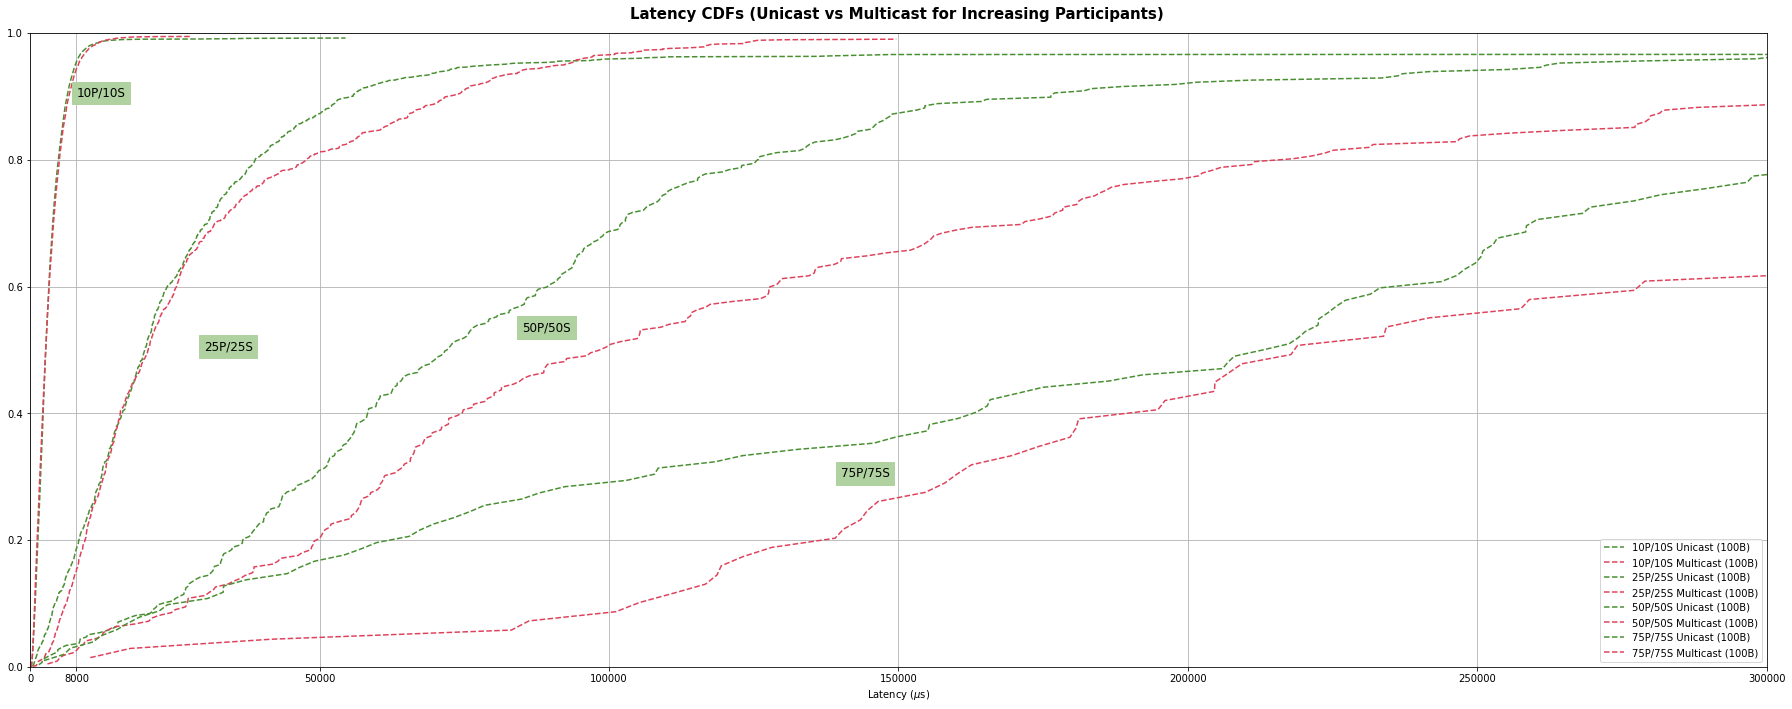

In [8]:
set2_plot_latency_cdfs()

## Latency CDFs Per Participant <a class="anchor" id="s2-latency-cdfs-per-participant"></a>

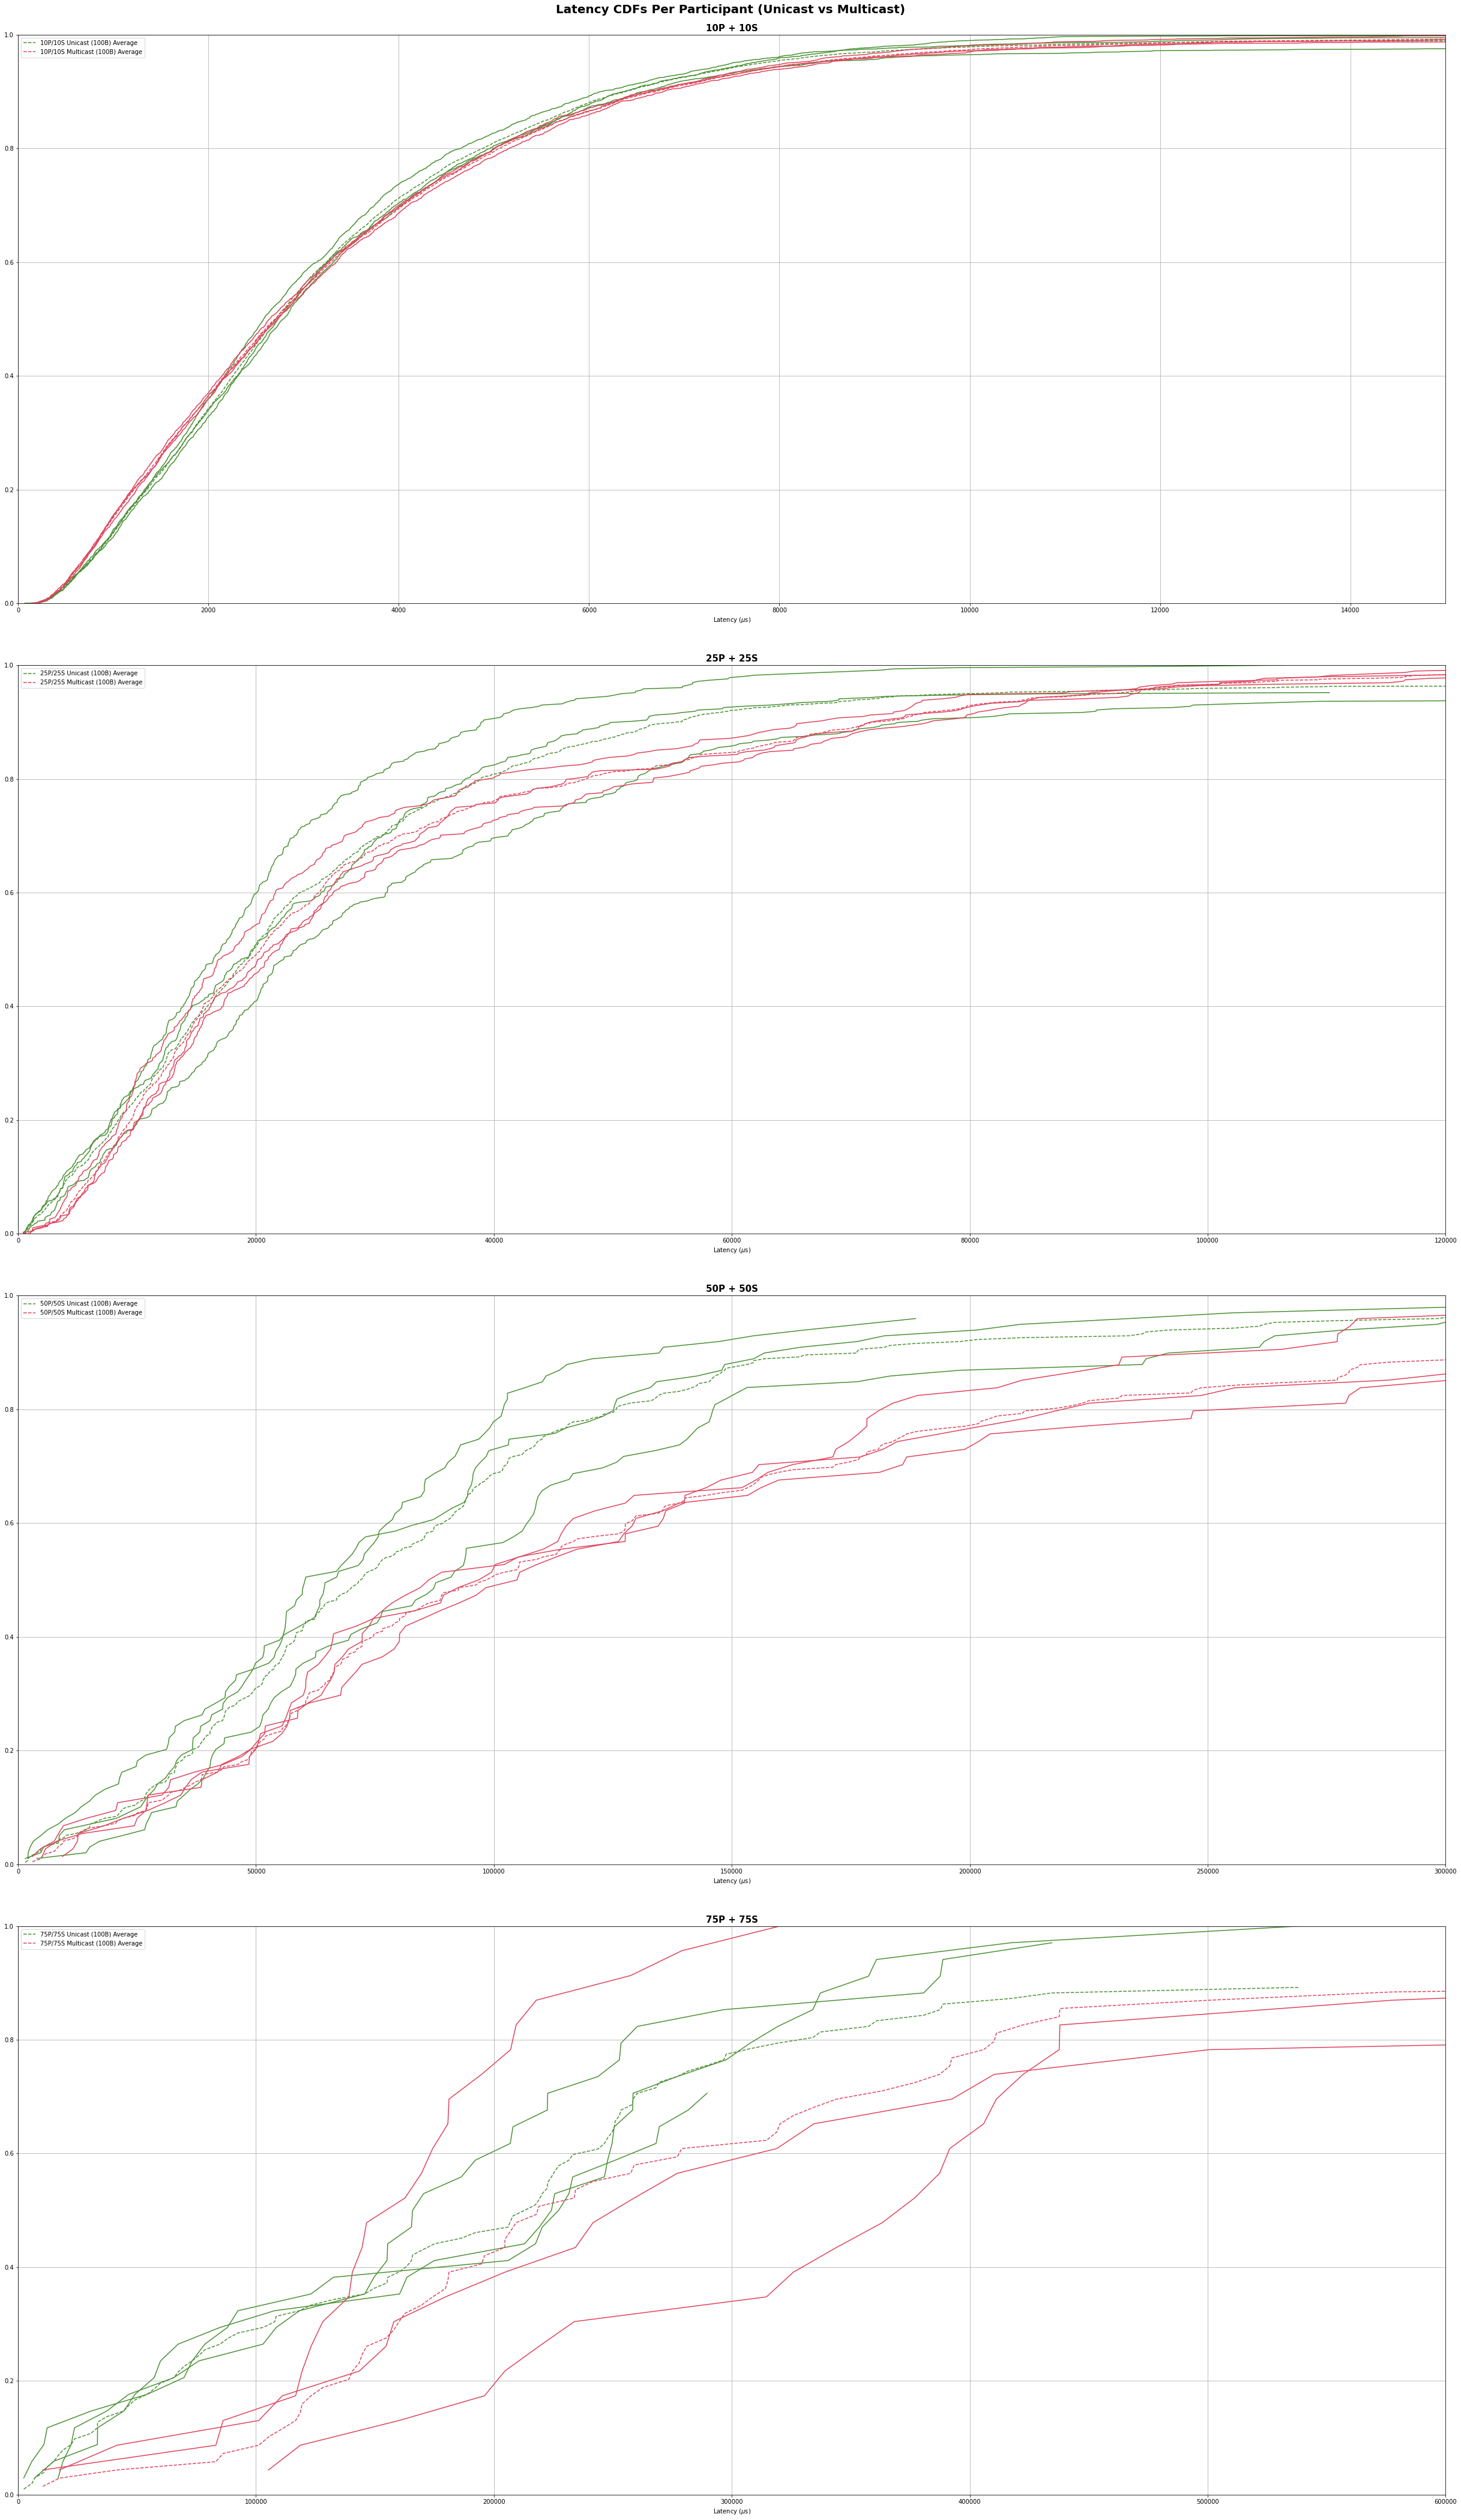

In [9]:
set2_plot_latency_cdfs_per_participant()

## Latency Average Per Participant Amount

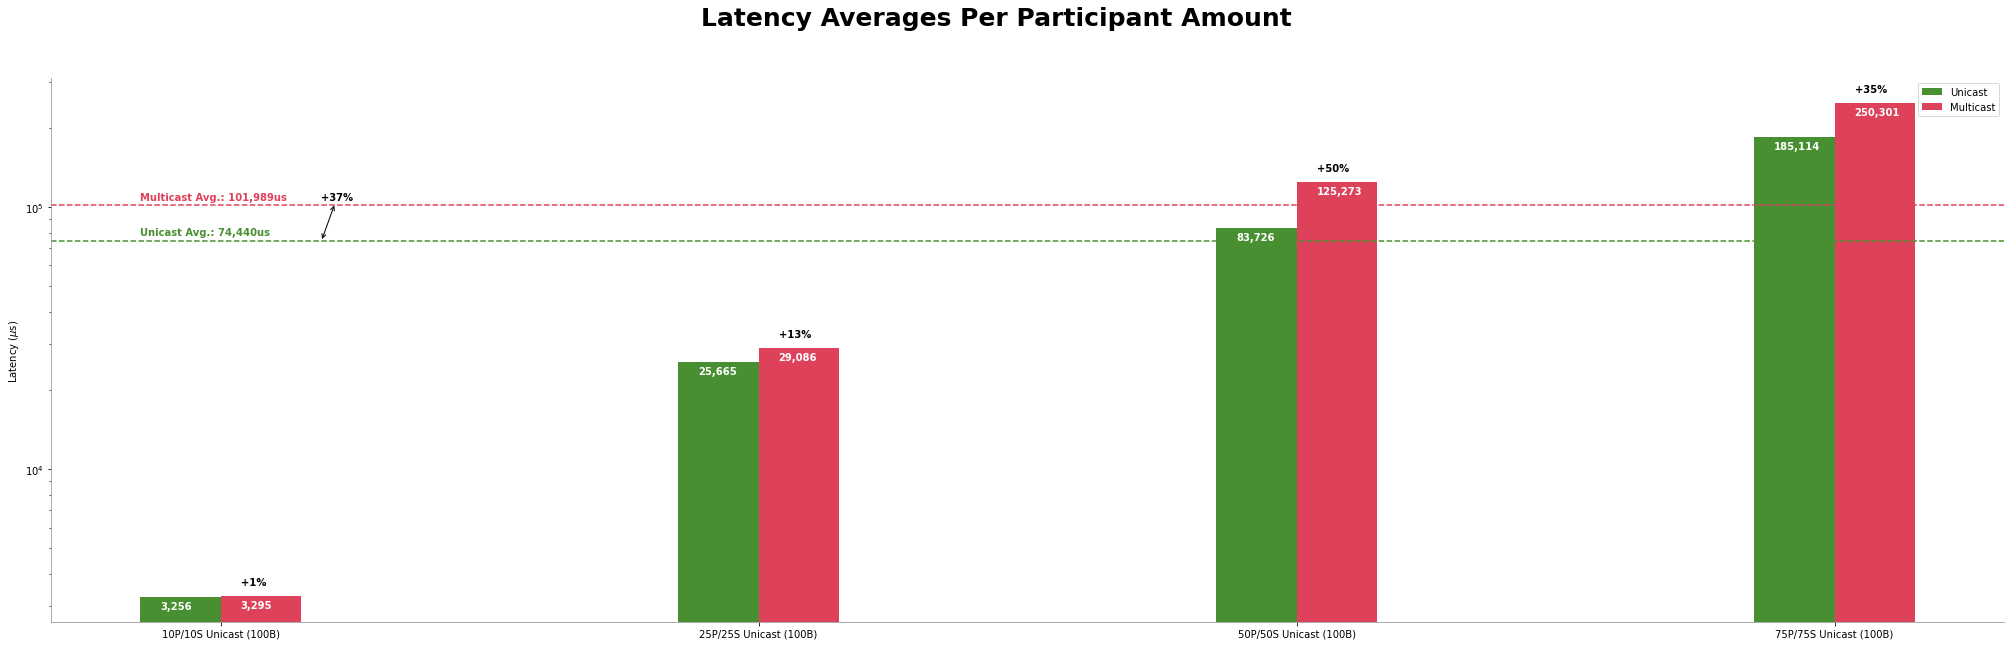

In [10]:
s2_plot_latency_avg_per_participant()

## Throughput CDFs <a class="anchor" id="s2-throughput-cdfs"></a>

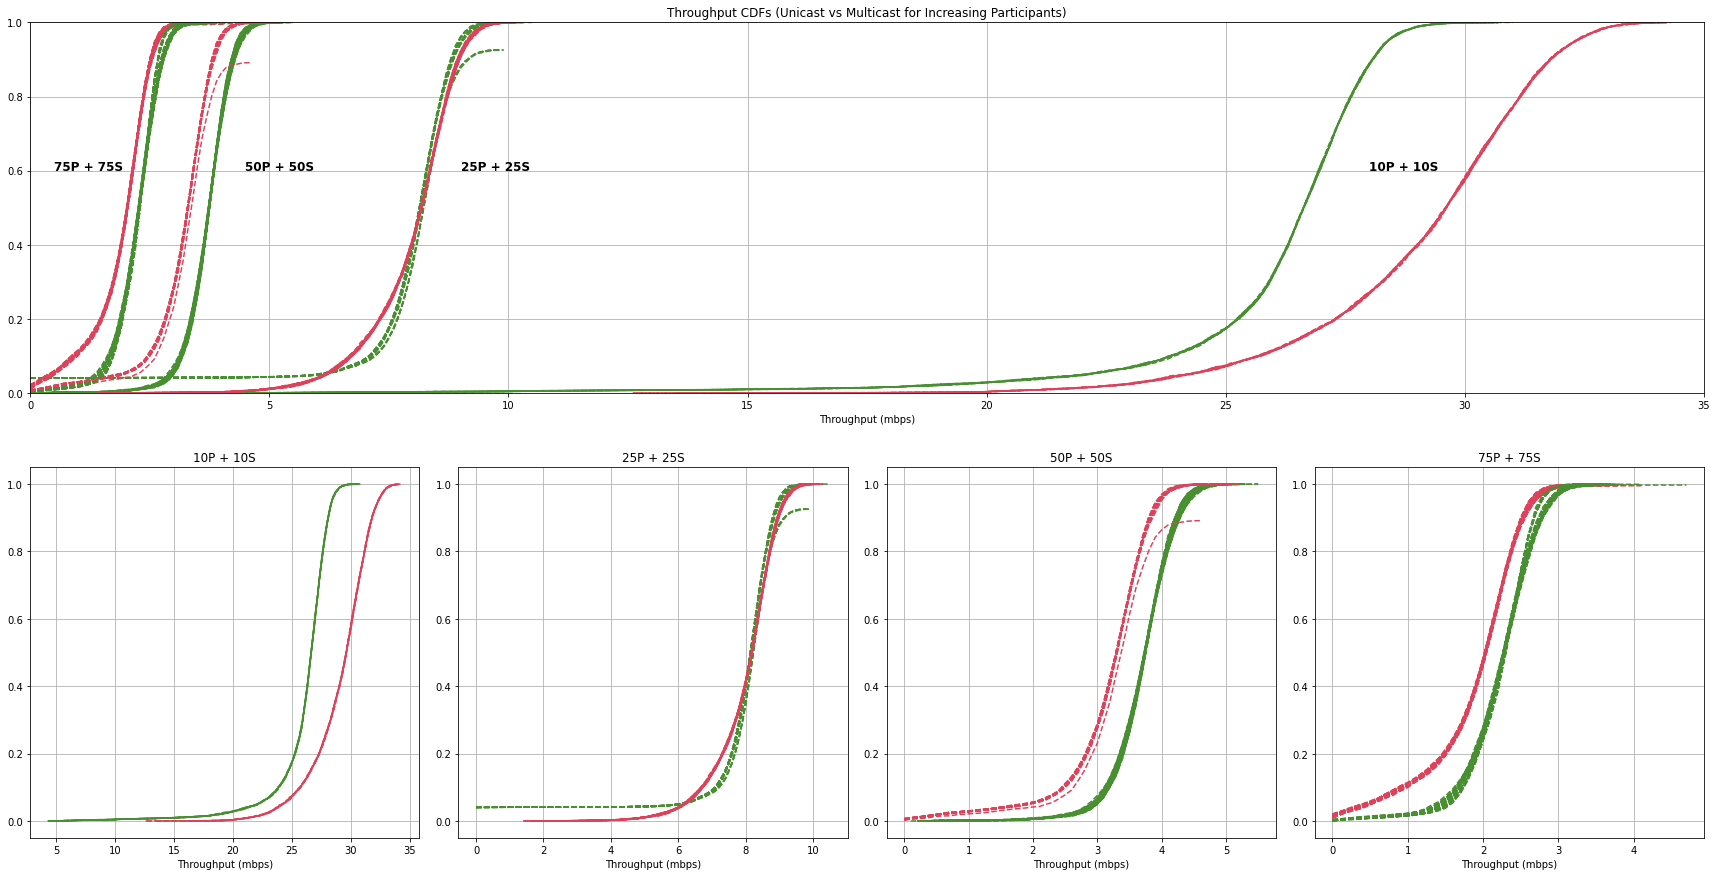

In [11]:
set2_plot_tp_cdfs()

# Set 2 Rerun Analysis: Unicast vs Multicast <a class="anchor" id="set2-rerun"></a>

## Introduction <a class="anchor" id="s2r-introduction"></a>

When looking at the latency results of Set 2 we noticed a lot of variation between runs of the same test. Now this was strange because everything should have been the same in terms of the test parameters for each run. It would work by first restarting the VM, then running the test (run 1), then restarting the VM, then running the test (run 2), then restarting the VM, then running the test for the final time (run 3). 

The variation between runs would increase corresponding with the increase in participant amount. Below is a bar chart demonstrating the variation between the averages of each run:

## Average Latency Variation Per Participant Amount

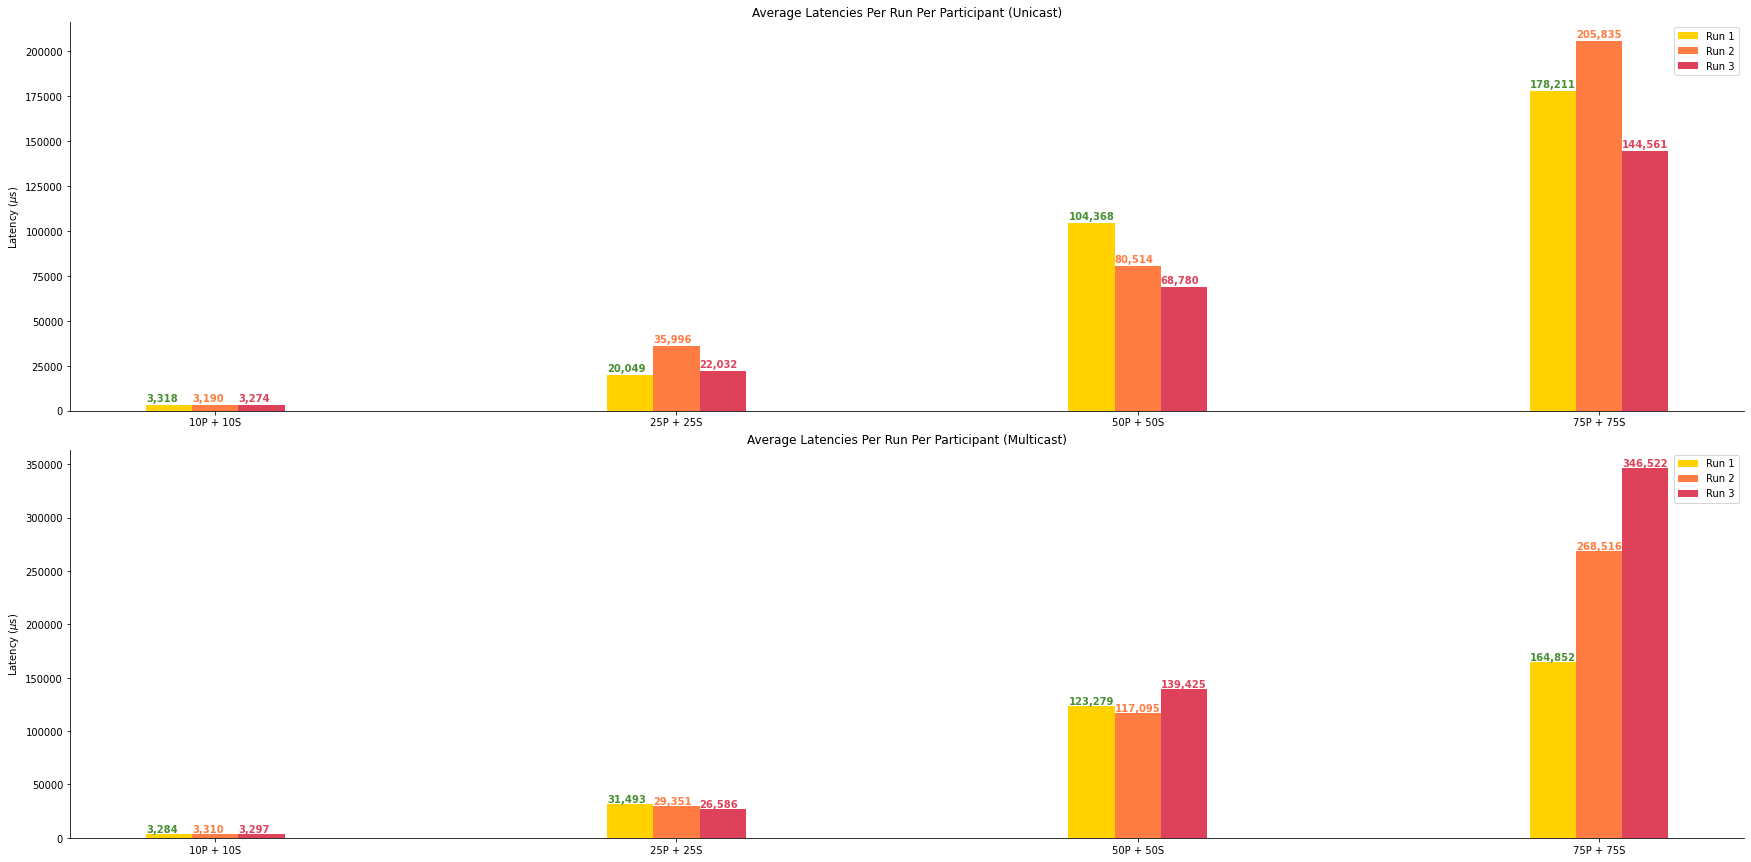

In [12]:
s2_rerun_plot_latency_variation_per_participant()

As seen in the bar chart above:
- latency variation for 10P + 10S is minimal
- latency variation for 25P + 25S Unicast is quite visible especiall for run 2
    - run 2 avg is almost double run 1
- latency variation for 25P + 25S Multicast is visible
    - there is a 20% difference between run 1 and run 3
- latency variation for 50P + 50S is large
    - Unicast run 1 is almost double run 3
    - Multicast variation is not as large as Unicast
- latency variation for 75P + 75S is quite large too

Therefore, we want to investigate why exactly there is this variation between runs despite all known variables being constant. We reran the Set 2 test but this time we tracked the CPU and network usage. Below we first plot the latency CDFs per participant amount and then we plot the network usage below it.

## Latency CDFs vs Network Usage

In [20]:
print([file for file in get_files("data/set_2") if 'average_latencies' in file])

fig = plt.figure(figsize=(30, 15))
grid = plt.GridSpec(2, 4, figure=fig, hspace=0.1, wspace=0.1)

top_ax = {
    "0": grid[0, 0],
    "1": grid[0, 1],
    "2": grid[0, 2],
    "3": grid[0, 3]
}

bot_ax = {
    "0": grid[1, 0],
    "1": grid[1, 1],
    "2": grid[1, 2],
    "3": grid[1, 3]
}

[
    'data/set_2\\2_10_participant_measure_multicast_5_75_participants_forced_transport\\avera
ge_latencies.csv',
    'data/set_2\\2_1_participant_measure_unicast_1_network_log_rerun\\average_latencies.csv',
    'data/set_2\\2_2_participant_measure_unicast_2_network_log_rerun\\average_latencies.csv',
    'data/set_2\\2_3_participant_measure_unicast_3_network_log_rerun\\average_latencies.csv',
    'data/set_2\\2_4_participant_measure_unicast_4_network_log_rerun\\average_latencies.csv',
    'data/set_2\\2_9_participant_measure_unicast_5_75_participants_forced_transport\\average_
latencies.csv'
]

<Figure size 2160x1080 with 0 Axes>

# Set 3 Analysis: Distributed Denial of Service <a class="anchor" id="set3"></a>

## Introduction <a class="anchor" id="s3-introduction"></a>
This set of tests focuses on the performance change when DDS is under a DDOS attack. We have two amounts of participants that we can compare with Set 2.

In Set 2 we had:
1. 25 pubs + 25 subs: 50 participants
2. 50 pubs + 50 subs: 100 participants

In Set 3 we have:
1. 25 pubs + 25 mal pubs + 25 subs + 25 mal subs: 100 participants
2. 50 pubs + 50 mal pubs + 50 subs + 50 mal subs: 200 participants

Therefore, we can compare Set 2 (1.) with Set 3 (1.) and Set 2 (2.) with Set 3 (2.) since in both cases they have the same amount of legitimate participants. For all Set 3 results we combine all of the measurements into a single list and plot these into CDFs since we are not focusing on the difference between specific runs.

For the DDOS attacks we have taken half of the participants and placed them in a separate domain where they exchange samples of the following ranges:
- 300 bytes
- 500 bytes
- 1 kilobyte
- 16 kilobytes
- 64 kilobytes
- 128 kilobytes
- 512 kilobytes
- 1 megabytes

Therefore, we first look at the comparison between Set 2 and Set 3 with 50 legitimate participants before looking at the comparison between Set 2 and Set 3 with 100 legitimate participants.

## 50 Participant Comparison <a class="anchor" id="s3-50-participant-comparison"></a>

### Latency CDFs Per Data Length <a class="anchor" id="s3-latency-cdfs-per-data-length"></a>

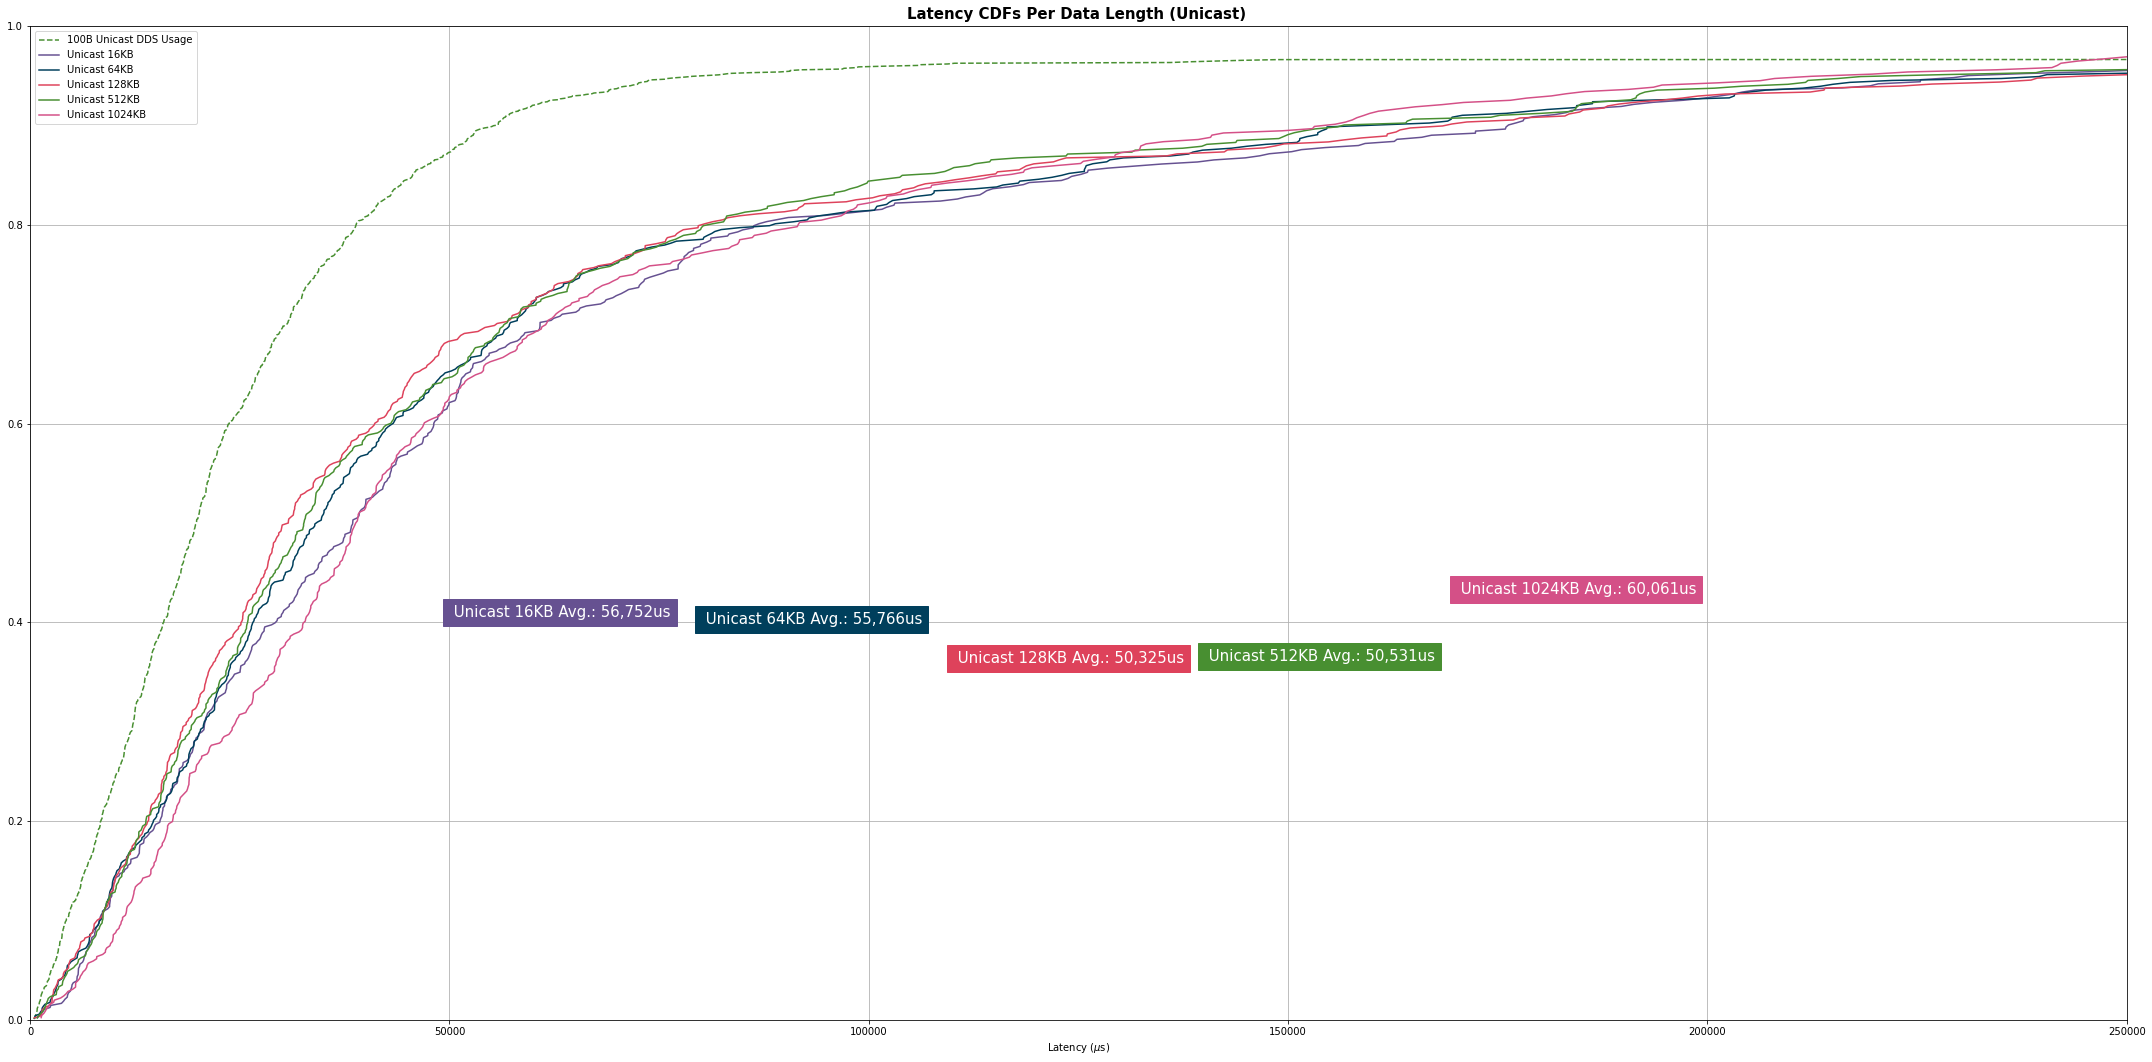

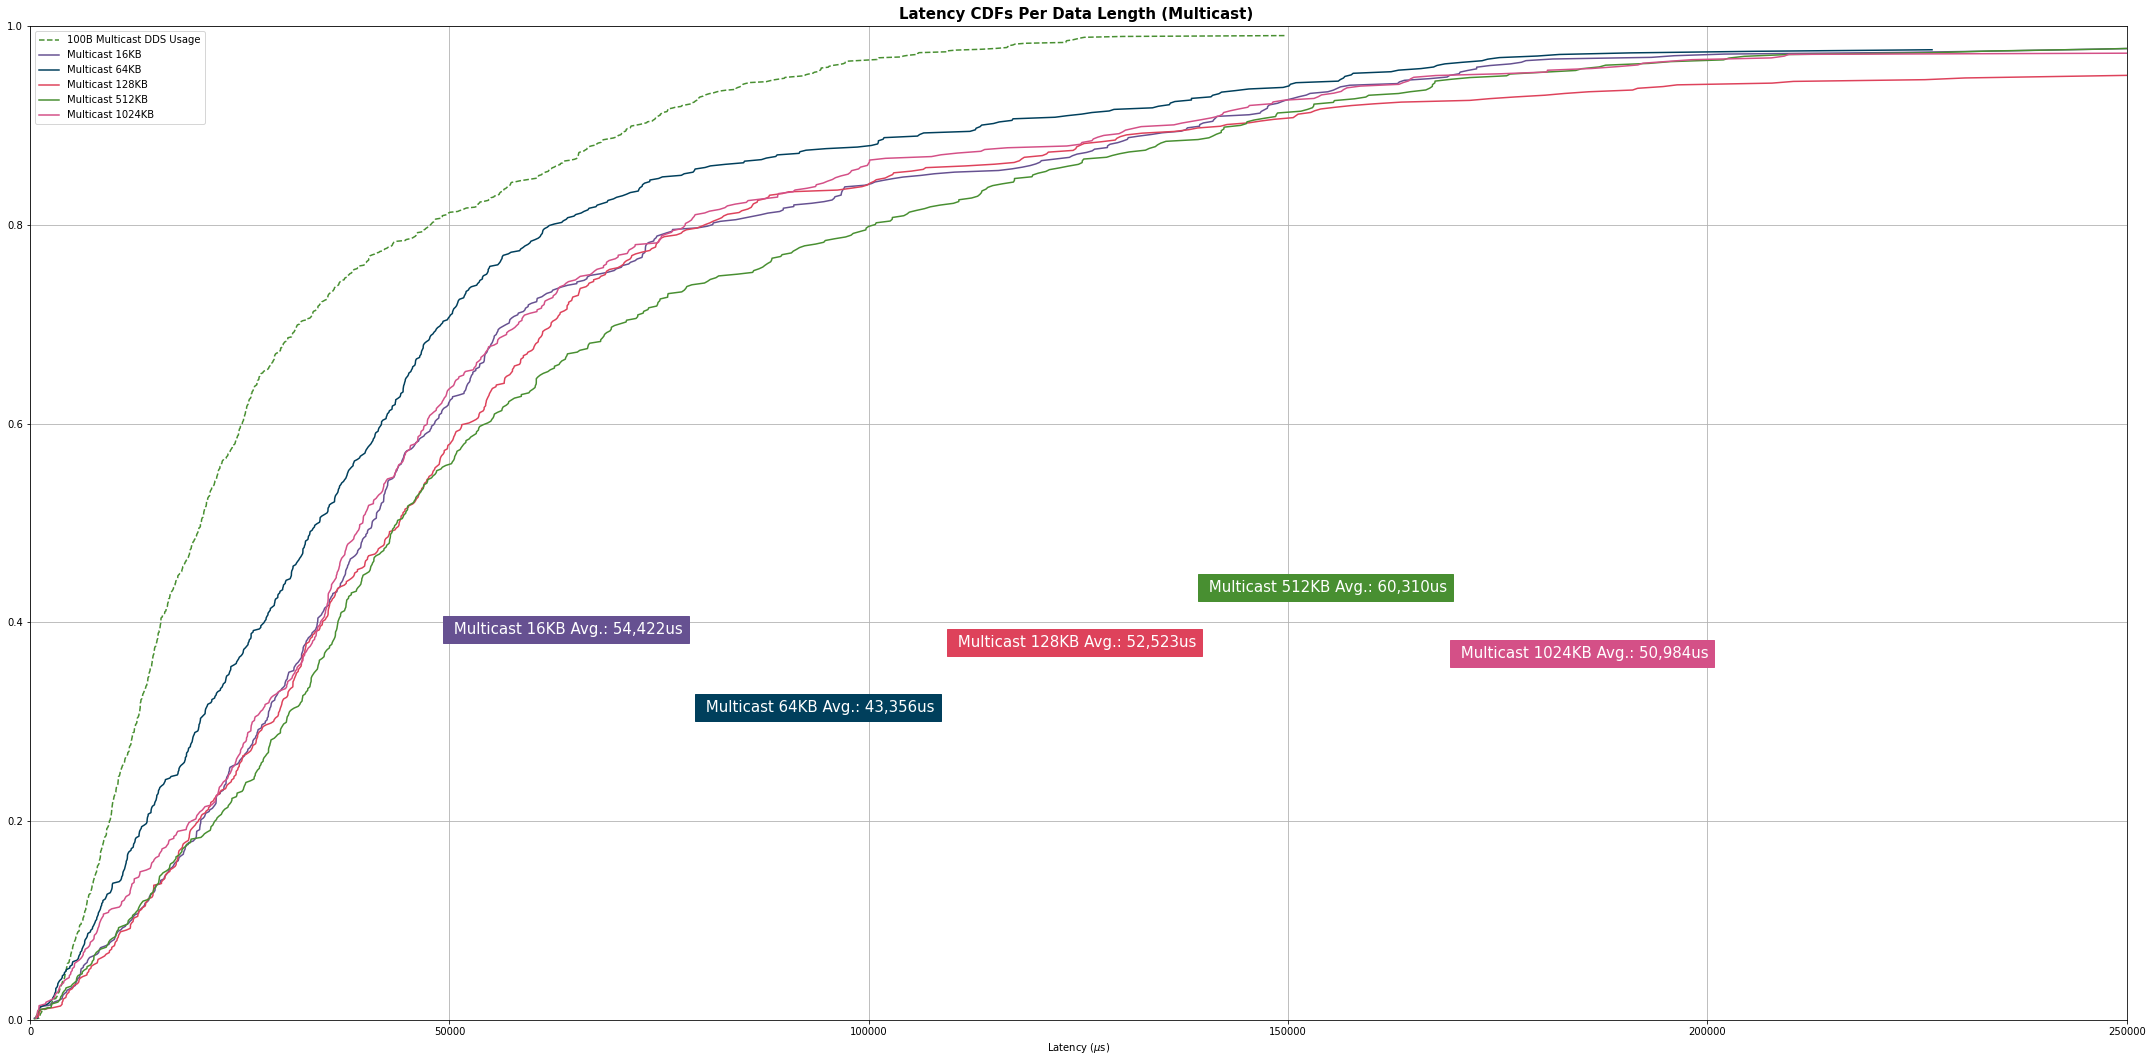

In [13]:
from set_3_functions import *

plot_s3_latency_cdfs_unicast()
plot_s3_latency_cdfs_multicast()

## 100 Participant Comparison <a class="anchor" id="s3-100-participant-comparison"></a>

### Latency CDFs Per Data Length <a class="anchor" id="latency-cdfs-per-data-length"></a>